In [1]:
using PyPlot
ioff()

In [2]:
WORLD_HEIGHT = 7
WORLD_WIDTH = 10
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
WIND_PROBABILITY = .9

ACTION_UP = 1
ACTION_DOWN = 2
ACTION_LEFT = 3
ACTION_RIGHT = 4

EPSILON = 0.1
ALPHA = .5
REWARD = -1
START = [4,1]
GOAL = [4,8]
ACTIONS = [ACTION_UP,ACTION_DOWN,ACTION_LEFT,ACTION_RIGHT]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [3]:
function step(state, action)
    i, j = state
    
    if rand() < WIND_PROBABILITY
        wind = WIND[j]
    else
        wind = 0
    end
    if action == ACTION_UP
        return [max(i - 1 - wind, 1), j]
        
    elseif action == ACTION_DOWN
         return [max(min(i + 1 - wind, WORLD_HEIGHT), 1), j]
        
    elseif action == ACTION_LEFT
        return [max(i - wind, 1), max(j - 1, 1)]
        
    elseif action == ACTION_RIGHT
        return [max(i - wind, 1), min(j + 1, WORLD_WIDTH)]
    end
end

step (generic function with 1 method)

In [4]:
function episode(q_value)
    # track the total time steps in this episode
    time = 0
    
    # initialize state
    state = START
    # choose an action based on epsilon-greedy algorithm
    if rand(1)[1] < EPSILON
        action = ACTIONS[rand(1:4)]
    else
        values_ = q_value[state[1], state[2], :]
        action = []
        for i in enumerate(values_)
            action_,value_ = i
            if value_ == maximum(values_)
                push!(action,action_)
            end
        end
        action = action[rand(1:length(action))]
    end
    
    # keep going until get to the goal state
    while state != GOAL

        next_state = step(state,action)
        if rand(1)[1] < EPSILON
            next_action = ACTIONS[rand(1:4)]
        else
            values_ = q_value[next_state[1], next_state[2], :]
            next_action = []
            for i in enumerate(values_)
                action_,value_ = i
                if value_ == maximum(values_)
                    push!(next_action,action_)
                end
            end
            next_action = next_action[rand(1:length(next_action))]
        end
        # Sarsa update
        q_value[state[1], state[2], action] += ALPHA * (REWARD + q_value[next_state[1], next_state[2], next_action] - q_value[state[1], state[2], action])
        state = next_state
        action = next_action
        time += 1
    end

    return time
end

episode (generic function with 1 method)

In [5]:
#FUNCION PARA IMPRIMIR POLITICA ROBADA ILEGALMENTE DEL RICARDO
function print_optimal_policy(q_value)
    optimal_policy = []
    for i in range(1, stop=WORLD_HEIGHT)
        push!(optimal_policy,[])
        for j in range(1, stop=WORLD_WIDTH)
            if [i, j] == GOAL
                append!(optimal_policy[end], 'G')
                continue
            end
            bestAction = argmax(q_value[i, j, :])
            if bestAction == ACTION_UP
                append!(optimal_policy[end], 'U')
            elseif bestAction == ACTION_DOWN
                append!(optimal_policy[end], 'D')
            elseif bestAction == ACTION_LEFT
                append!(optimal_policy[end], 'L')
            elseif bestAction == ACTION_RIGHT
                append!(optimal_policy[end], 'R')
            end
        end
    end
    for row in optimal_policy
        println(row)
    end
end

print_optimal_policy (generic function with 1 method)

In [6]:
function figure_6_3()
    q_value = zeros((WORLD_HEIGHT,WORLD_WIDTH,4))
    episode_limit = 300
    steps = []
    ep = 0
    while ep < episode_limit
        push!(steps,episode(q_value))
        ep+=1
    end
    println("SARSA Optimal Policy:")
    print_optimal_policy(q_value)
    println("")
    return steps
end


figure_6_3 (generic function with 1 method)

In [7]:
y = figure_6_3();

SARSA Optimal Policy:
Any['U', 'U', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
Any['U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
Any['U', 'L', 'R', 'R', 'R', 'R', 'R', 'U', 'R', 'D']
Any['D', 'R', 'R', 'R', 'R', 'U', 'R', 'G', 'R', 'D']
Any['D', 'D', 'R', 'R', 'R', 'R', 'D', 'D', 'L', 'L']
Any['R', 'D', 'D', 'R', 'R', 'L', 'L', 'D', 'L', 'L']
Any['R', 'R', 'D', 'R', 'D', 'R', 'U', 'D', 'L', 'L']



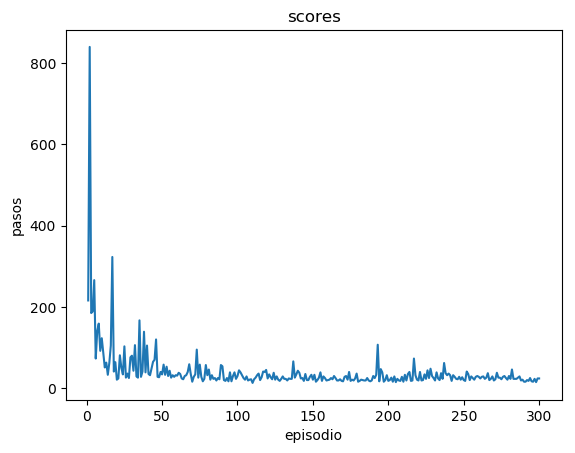

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000261ECE80>

In [8]:
plt[:title]("scores")
plt[:xlabel]("episodio")
plt[:ylabel]("pasos")
plt[:plot]([i for i in 1:length(y)],y)